In [25]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [26]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

df = pd.read_csv(url, names=columns, na_values=" ?", skipinitialspace=True)

In [27]:
# Display basic info
print("Dataset Overview:")
print(df.head())

# Handle Missing Values
df.dropna(inplace=True)

print("Data after handling missing values:")
print(df.head())

Dataset Overview:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0         

In [28]:
# Encode Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [29]:
# Descriptive Analysis
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
                age     workclass        fnlwgt     education  education-num  \
count  32561.000000  32561.000000  3.256100e+04  32561.000000   32561.000000   
mean      38.581647      3.868892  1.897784e+05     10.298210      10.080679   
std       13.640433      1.455960  1.055500e+05      3.870264       2.572720   
min       17.000000      0.000000  1.228500e+04      0.000000       1.000000   
25%       28.000000      4.000000  1.178270e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.783560e+05     11.000000      10.000000   
75%       48.000000      4.000000  2.370510e+05     12.000000      12.000000   
max       90.000000      8.000000  1.484705e+06     15.000000      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    32561.000000  32561.000000  32561.000000  32561.000000  32561.000000   
mean         2.611836      6.572740      1.446362      3.665858      0.669205   
std        

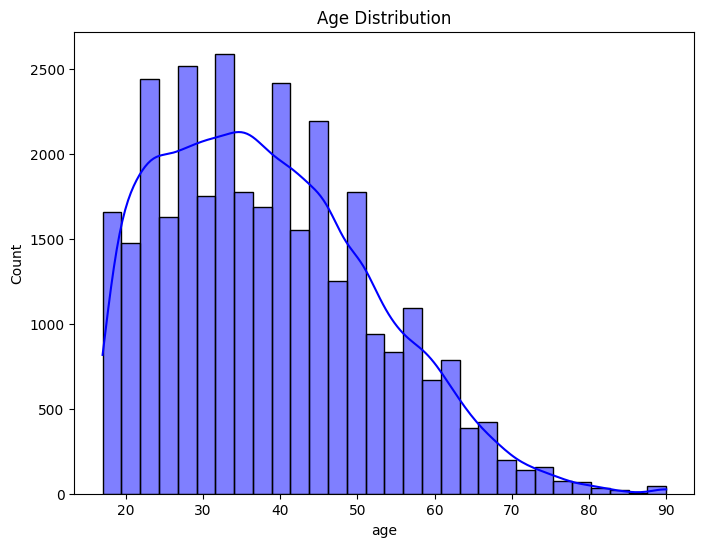

<ipython-input-30-cd85d25df073>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['income'], palette="Set2")


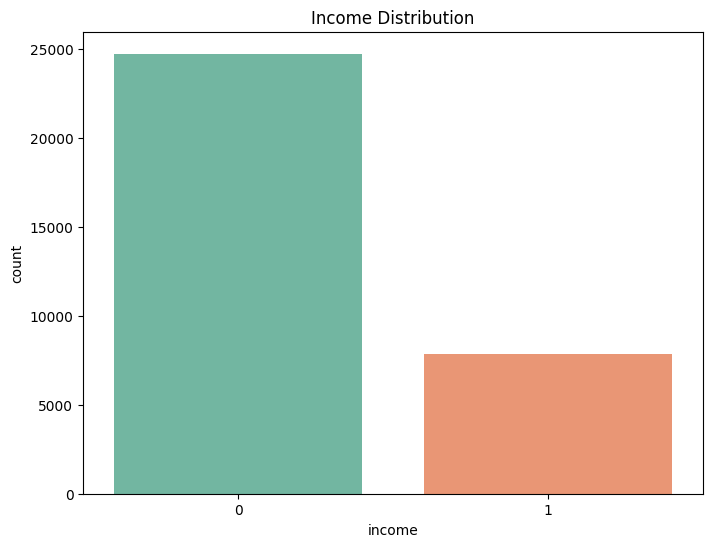

<ipython-input-30-cd85d25df073>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="income", y="hours-per-week", data=df, palette="coolwarm")


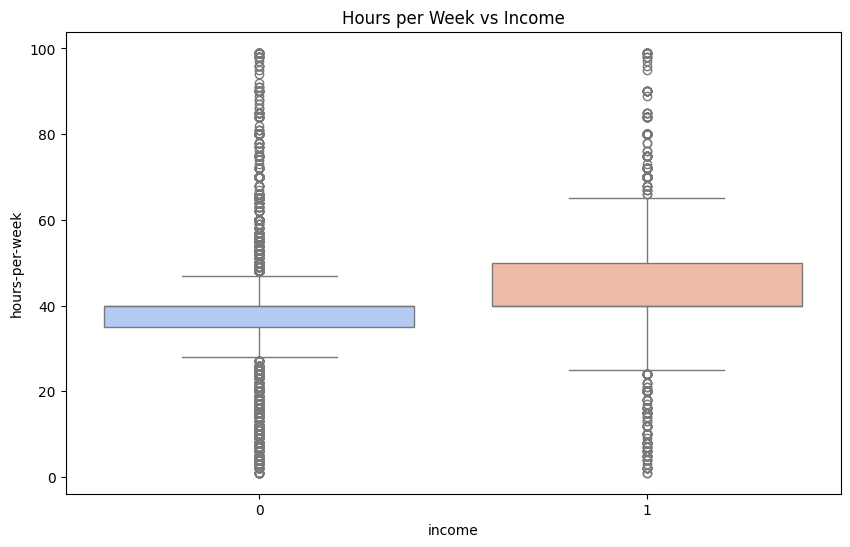

In [30]:
# Visualizations
plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x=df['income'], palette="Set2")
plt.title("Income Distribution")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="income", y="hours-per-week", data=df, palette="coolwarm")
plt.title("Hours per Week vs Income")
plt.show()

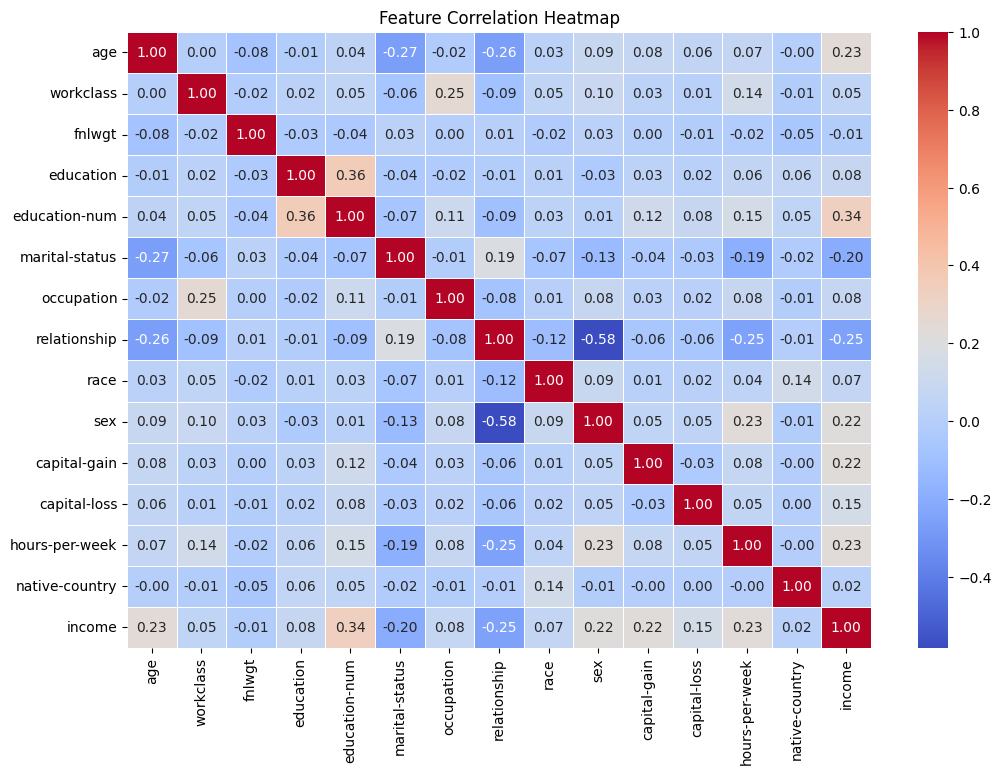

In [40]:
# Correlation Matrix
correlation_matrix = df.corr()

# Plot Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [41]:
# Feature Selection
X = df.drop("income", axis=1)
y = df["income"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Normalize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model Performance:
Logistic Regression: Accuracy = 0.8247
Decision Tree: Accuracy = 0.8113
Random Forest: Accuracy = 0.8634
Gradient Boosting: Accuracy = 0.8709
SVM: Accuracy = 0.8173

Best Model Selected: GradientBoostingClassifier

Confusion Matrix:
[[4700  242]
 [ 599  972]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4942
           1       0.80      0.62      0.70      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.81      6513
weighted avg       0.87      0.87      0.86      6513



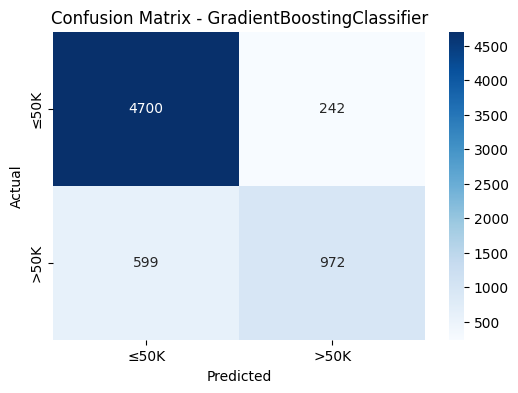

In [43]:
# Train Machine Learning Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(kernel="linear")
}

print("\nModel Performance:")
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.4f}")

    # Track the best-performing model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Display Confusion Matrix for Best Model
print("\nBest Model Selected:", type(best_model).__name__)
y_pred_best = best_model.predict(X_test_scaled)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Display Confusion Matrix as Heatmap
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["≤50K", ">50K"], yticklabels=["≤50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {type(best_model).__name__}")
plt.show()



Feature Importance:
           Feature  Importance
7     relationship    0.352301
10    capital-gain    0.220341
4    education-num    0.200869
0              age    0.062788
11    capital-loss    0.057275
12  hours-per-week    0.037412
5   marital-status    0.027722
6       occupation    0.024493
1        workclass    0.005936
9              sex    0.003972
2           fnlwgt    0.003396
3        education    0.002048
13  native-country    0.000971
8             race    0.000476


<ipython-input-34-732edadde02b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")


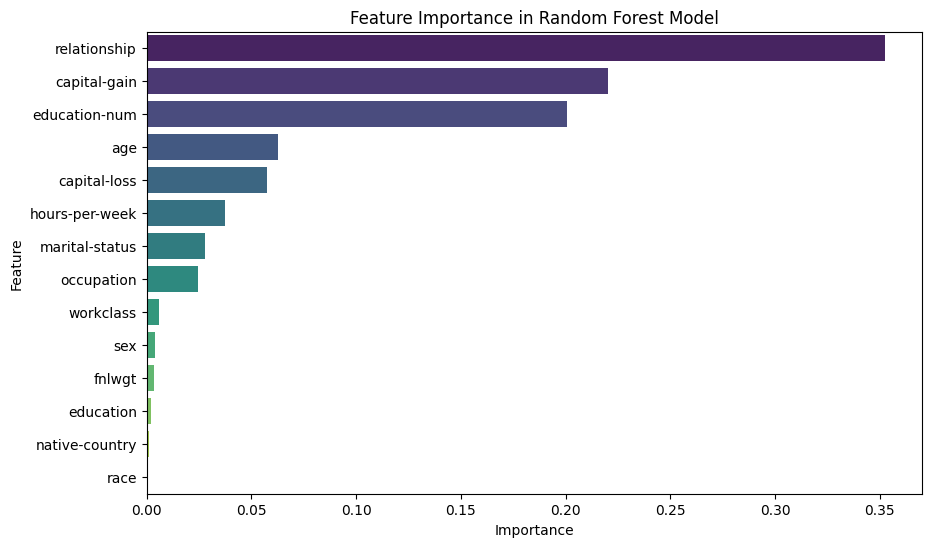

In [34]:
# Statistical Analysis - Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(feature_importances)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [39]:
# Predict Income for a New Person
def predict_income(new_data):
    # Convert dictionary to DataFrame
    new_df = pd.DataFrame([new_data])

    # Encode categorical variables
    for col in label_encoders:
        if col in new_df.columns:
            try:
                new_df[col] = label_encoders[col].transform(new_df[col])
            except ValueError:  # Handle unseen categories
                new_df[col] = -1  # Assign an unknown category label

    # Scale numerical features
    new_df_scaled = scaler.transform(new_df)

    # Predict Income
    prediction = best_model.predict(new_df_scaled)

    return "Income > $50K" if prediction[0] == 1 else "Income ≤ $50K"

# Example: Predicting Income for a New Individual
new_person = {
    "age": 35, "workclass": "Private", "fnlwgt": 150000, "education": "Bachelors",
    "education-num": 13, "marital-status": "Married-civ-spouse", "occupation": "Exec-managerial",
    "relationship": "Husband", "race": "White", "sex": "Male",
    "capital-gain": 5000, "capital-loss": 0, "hours-per-week": 40, "native-country": "United-States"
}

# Run the prediction
print("\nPrediction for new individual:", predict_income(new_person))



Prediction for new individual: Income ≤ $50K
